In [23]:
# Gamaliel Marines Olvera - A01708746


#Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model).
# Cada modelo puede contener múltiples agentes.
from mesa import Agent, Model 

# Debido a que necesitamos que existe un solo agente por celda, elegimos ''SingleGrid''.
from mesa.space import SingleGrid

# Con ''SimultaneousActivation, hacemos que todos los agentes se activen ''al mismo tiempo''.
from mesa.time import SimultaneousActivation

# Haremos uso de ''DataCollector'' para obtener información de cada paso de la simulación.
from mesa.datacollection import DataCollector

from mesa.space import ContinuousSpace

# matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Importamos los siguientes paquetes para el mejor manejo de valores numéricos.
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime


In [24]:
class CleaningAgent(Agent):
    #def __init__(self, id, model, a_type):
    def __init__(self, id, model):
        super().__init__(id, model)
        #self.type = a_type
        
    def step(self):
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        #same_type = 0   
        total_neighbors = 0
        #fraction = 0
        for neighbor in neighbors:
            total_neighbors +=1

In [11]:
def get_grid(model):
    """ Esta función nos permite obtener el estado de los diferentes agentes.
        *param* model : Modelo del que obtendrá la información. 
        *return* una matriz con la información del estado de cada uno de los agentes."""
    grid = np.zeros( (model.grid.width, model.grid.height) )
    for (content, (x, y)) in model.grid.coord_iter():
        if (content == None):
            grid[x][y] = 0
        else:
            grid[x][y] = content.type
    return grid

In [17]:
class CleaningModel(Model):
    """ Define nuestro modelo, los agentes y su entorno."""
    def __init__(self, width, height, empty_cells):
        self.num_agents = int( (width * height) * (1 - empty_cells) )
        self.grid = SingleGrid(width, height, torus = False)
        # Tengo que cambiar esto, esto es para los agentes, no para las celdas
        self.schedule = RandomActivation(self)
        # Aquí definimos el recolector para obtener el grid completo.
        self.datacollector = DataCollector(model_reporters={"Grid": get_grid})
        
        id = 0
        amount = self.num_agents // diff_types
        for i in range(1, (diff_types + 1)):
            for j in range(amount):
                a = CleaningAgent(id, self, i)
                self.grid.move_to_empty(a)
                self.schedule.add(a)
                id = id + 1
    
    def step(self):
        """ Ejecuta un paso de la simulación."""
        self.datacollector.collect(self)
        self.schedule.step()

In [19]:
WIDTH = 8
HEIGHT = 8
TYPES = 2
EMPTY_CELLS = .20

# Definimos el número máximo de generaciones a correr
MAX_GENERATIONS = 60

# Registramos el tiempo de inicio y ejecutamos la simulación
start_time = time.time()
model = CleaningModel(WIDTH, HEIGHT, TYPES, EMPTY_CELLS)
for i in range(MAX_GENERATIONS):
    model.step()
    
# Imprimimos el tiempo que le tomó correr al modelo.
print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(time.time() - start_time))))

Tiempo de ejecución: 0:00:00.025332


In [20]:
# Obtenemos la información que almacenó el colector, este nos entregará un DataFrame de pandas que contiene toda la información.
all_grid = model.datacollector.get_model_vars_dataframe()

/var/folders/hx/jdv9z5kj44b5b90287xxdb1w0000gn/T/ipykernel_13795/1230851970.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  patch = plt.imshow(all_grid.iloc[0][0], cmap=plt.cm.binary)
/var/folders/hx/jdv9z5kj44b5b90287xxdb1w0000gn/T/ipykernel_13795/1230851970.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  patch.set_data(all_grid.iloc[i][0])


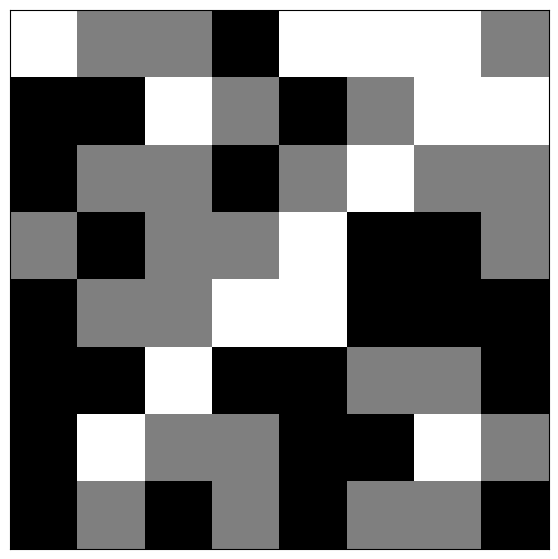

In [21]:
# Graficamos la información usando `matplotlib`
# %%capture

fig, axs = plt.subplots(figsize=(7,7))
axs.set_xticks([])
axs.set_yticks([])
patch = plt.imshow(all_grid.iloc[0][0], cmap=plt.cm.binary)

def animate(i):
    patch.set_data(all_grid.iloc[i][0])
    
anim = animation.FuncAnimation(fig, animate, frames=MAX_GENERATIONS)

In [22]:
anim

/var/folders/hx/jdv9z5kj44b5b90287xxdb1w0000gn/T/ipykernel_13795/1230851970.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  patch.set_data(all_grid.iloc[i][0])
